<a href="https://colab.research.google.com/github/Inshalmunaf/Deep_Learning_Project1/blob/main/DeepLearning__Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

100%|██████████| 64.4M/64.4M [00:00<00:00, 238MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4


In [9]:
import os
import pandas as pd
import numpy as np
import cv2

In [10]:
Test_path = os.path.join(path,'test')
Train_path = os.path.join(path,'train')


In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D , MaxPool2D ,Dense, Flatten , BatchNormalization , Dropout

In [12]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = Train_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = Test_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [13]:
#Normalize
def process(image , label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

test_ds = test_ds.map(process)
train_ds = train_ds.map(process)


In [ ]:
# Model Building
model = Sequential()

model.add(Conv2D( 32 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Conv2D( 64 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Conv2D( 128 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds , epochs= 10  , validation_data = test_ds)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 643ms/step - accuracy: 0.5211 - loss: 9.3950 - val_accuracy: 0.5214 - val_loss: 1.3824
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.5901 - loss: 11.6886 - val_accuracy: 0.5286 - val_loss: 1.7302
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.5290 - loss: 11.9289 - val_accuracy: 0.5143 - val_loss: 2.3600
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.5143 - loss: 9.9883 - val_accuracy: 0.5071 - val_loss: 1.9667
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.5904 - loss: 8.3558 - val_accuracy: 0.5000 - val_loss: 1.9215
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.5331 - loss: 8.2441 - val_accuracy: 0.5286 - val_loss: 3.6120
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.5502 - loss: 5.2335 - val_accuracy: 0.5286 - val_loss: 4.6158
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.6137 - loss: 4.2958 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

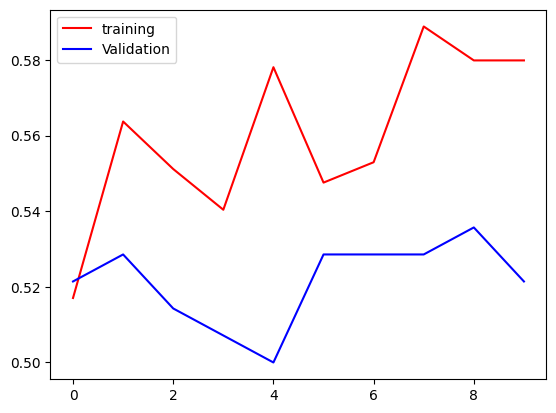

In [ ]:
plt.plot(history.history['accuracy'] , color = 'red' ,label = 'training')
plt.plot(history.history['val_accuracy'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

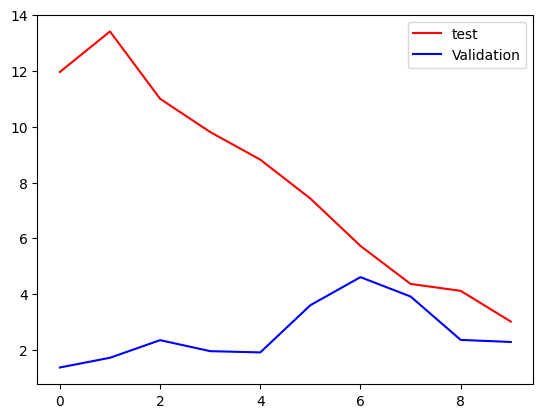

In [ ]:
plt.plot(history.history['loss'] , color = 'red' ,label = 'test')
plt.plot(history.history['val_loss'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

# **Using Pre Trained Model (VGG16)**

In [6]:
from tensorflow.keras.applications import VGG16
# Loading the pretrained model (VGG16)
base_model = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (256,256,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Freezing the base model
base_model.trainable = False

In [14]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
# CReating Own Classifier
model_assembled = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [18]:
model_assembled.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,249 (72.13 MB)

 Trainable params: 4,194,561 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
from tensorflow.keras.optimizers import Adam
#Compilation of model
model_assembled.compile(
    optimizer= Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
#Model Building
historyV2 = model_assembled.fit(
    train_ds,
    validation_data=test_ds,
    epochs =10
    )

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.6418 - loss: 1.3521 - val_accuracy: 0.7357 - val_loss: 0.6052
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.8841 - loss: 0.2625 - val_accuracy: 0.7214 - val_loss: 0.5409
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.9727 - loss: 0.0920 - val_accuracy: 0.8071 - val_loss: 0.4583
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.9957 - loss: 0.0502 - val_accuracy: 0.7643 - val_loss: 0.4636
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - accuracy: 0.9990 - loss: 0.0309 - val_accuracy: 0.7857 - val_loss: 0.4488
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 1.0000 - loss: 0.0236 - val_accuracy: 0.7571 - val_loss: 0.4757
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 1.0000 - loss: 0.0158 - val_accuracy: 0.7500 - val_loss: 0.4731
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 0